In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mne

In [25]:
# path_raw_data ：raw data storage folder
# save_path : Pre-processed data storage address
path_raw_data='G:\\dataset\\seed_v\\SEED V\\SEED-V\\EEG_raw'
save_path="G:\\dataset\\seed_v\\SEED V\\SEED-V\\"
files_name_array=os.listdir(path_raw_data)
files_name_array=files_name_array[0:48].copy()
files_name_array_sort=files_name_array.sort()
files_name_array.sort()

In [26]:
flie_name=files_name_array[0]

In [27]:
fname=path_raw_data+"\\"+flie_name

In [28]:
# read raw data ,the function is depend on device
raw_data= mne.io.read_raw_cnt(fname)

In [29]:
# check data information
print(raw_data)
print('\n')
print(raw_data.info)

<RawCNT | 10_1_20180507.cnt, 66 x 3383280 (3383.3 s), ~96 kB, data not loaded>


<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 dig: 69 items (3 Cardinal, 66 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2018-07-05 00:45:16 UTC
 nchan: 66
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>


In [30]:
# check channel name
print(raw_data.ch_names)


['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'VEO', 'HEO']


In [31]:
useless_ch = ['M1', 'M2', 'VEO', 'HEO','CB1','CB2']
raw_data.drop_channels(useless_ch)

<RawCNT | 10_1_20180507.cnt, 60 x 3383280 (3383.3 s), ~90 kB, data not loaded>

In [32]:
rename_channel={'FP1':'Fp1', 'FPZ':"Fpz",'FP2':'Fp2','FZ':'Fz', 'FCZ':'FCz','CZ':'Cz', 'CPZ':'CPz', 'PZ':'Pz', 'POZ':'POz', 'OZ':'Oz'}

In [33]:
raw_data.rename_channels(rename_channel)

<RawCNT | 10_1_20180507.cnt, 60 x 3383280 (3383.3 s), ~90 kB, data not loaded>

In [34]:
raw_data.set_montage(montage="standard_1020")

<RawCNT | 10_1_20180507.cnt, 60 x 3383280 (3383.3 s), ~88 kB, data not loaded>

In [35]:
raw_copy=raw_data.copy()
raw_copy.load_data()

Reading 0 ... 3383279  =      0.000 ...  3383.279 secs...


<RawCNT | 10_1_20180507.cnt, 60 x 3383280 (3383.3 s), ~1.51 GB, data loaded>

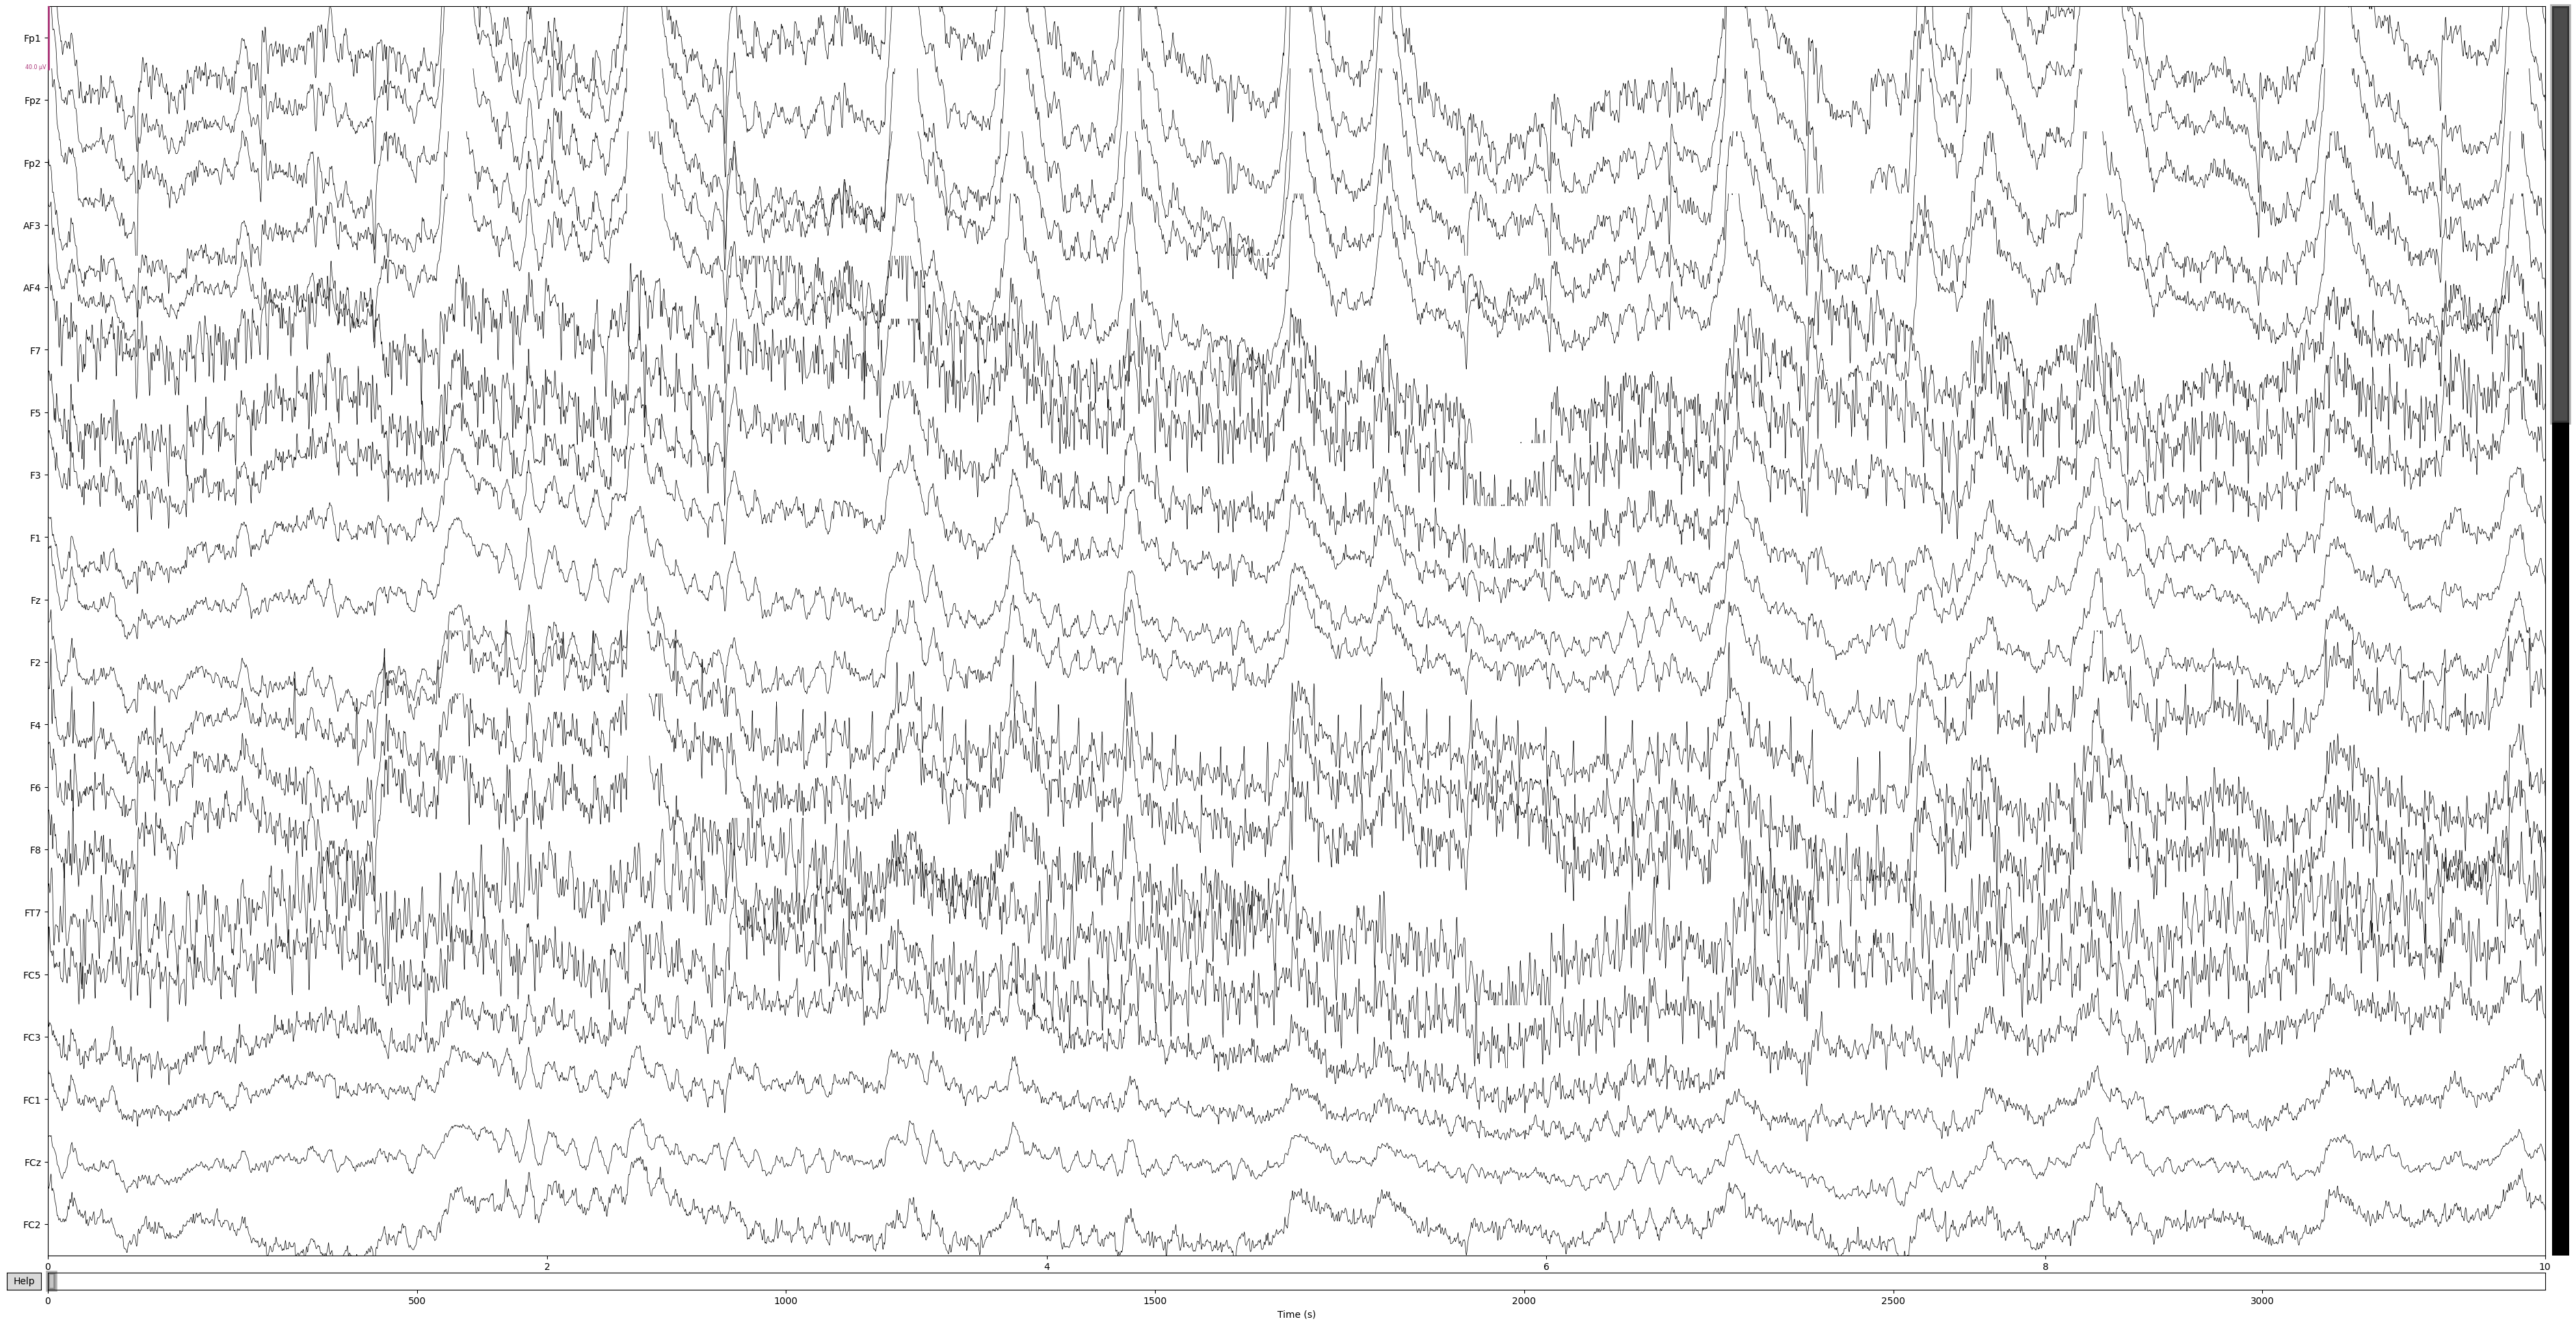

In [36]:
raw_data.plot()

In [37]:
raw_copy.notch_filter(freqs=50)
raw_copy.filter(l_freq=0.1,h_freq=30)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.3s finished


Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.4s finished


<RawCNT | 10_1_20180507.cnt, 60 x 3383280 (3383.3 s), ~1.51 GB, data loaded>

In [38]:
raw_copy.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawCNT | 10_1_20180507.cnt, 60 x 3383280 (3383.3 s), ~1.51 GB, data loaded>

In [39]:
eeg_down=raw_copy.copy().resample(sfreq=250)

In [40]:
print(eeg_down.ch_names)

['Fp1', 'Fpz', 'Fp2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POz', 'PO4', 'PO6', 'PO8', 'O1', 'Oz', 'O2']


In [41]:
use_channel=['Fp1', 'Fpz', 'Fp2','F7','F3', 'Fz', 'F4','F8', 'C3','Cz','C4','P3','Pz','P4','O1', 'Oz', 'O2' ]
use_data=eeg_down.pick_channels(use_channel)
print(use_data.ch_names)
# use_data.plot()

['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'C4', 'P3', 'Pz', 'P4', 'O1', 'Oz', 'O2']


In [42]:
data_down = eeg_down.get_data()

Channels marked as bad:
none


In [43]:
print(data_down.shape)

(17, 845820)


In [44]:
name=flie_name[:-4]+'.npy'
print(name)
save_name=save_path+name
# np.save(save_name, data_down)

10_1_20180507.npy
